In [2]:
from PIL import Image
import os

# Create a folder for files
files_folder = "images"
os.makedirs(files_folder, exist_ok=True)

# Create text files
for i in range(1, 4):
    file_name = f"file_{i}.txt"
    file_path = os.path.join(files_folder, file_name)
    
    with open(file_path, "w") as file:
        file.write(f"This is non-image file {i}.")

print("Non-image files have been created successfully.")


Non-image files have been created successfully.


,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Thumbnail
0,1bmp.bmp,RGB,BMP,3,0.19,256,256,images\1bmp.bmp,
1,1gif.gif,P,GIF,1,0.50,600,600,images\1gif.gif,
2,1jpg.jpg,RGB,JPEG,3,0.01,236,268,images\1jpg.jpg,
3,1png.png,RGBA,PNG,4,1.19,803,1417,images\1png.png,
4,2bmp.bmp,RGB,BMP,3,0.75,512,512,images\2bmp.bmp,
5,2gif.gif,P,GIF,1,5.09,550,414,images\2gif.gif,
6,2jpg.jpg,RGB,JPEG,3,0.06,811,811,images\2jpg.jpg,
7,2png.png,RGBA,PNG,4,0.49,498,720,images\2png.png,
8,3bmp.bmp,RGB,BMP,3,0.75,512,512,images\3bmp.bmp,
9,3gif.gif,P,GIF,1,1.02,634,356,images\3gif.gif,

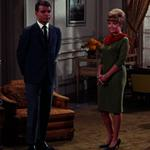
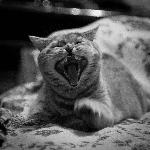
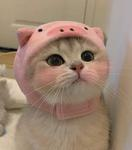
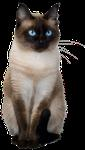
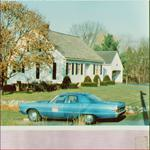
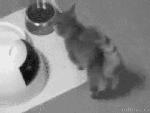
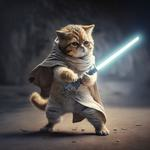
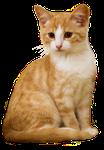
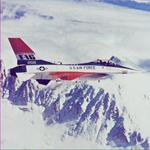
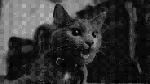
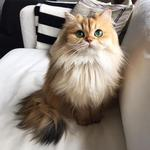
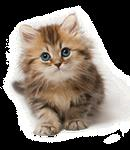
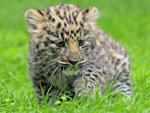
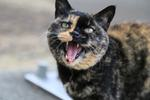
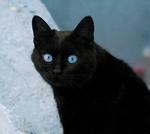

In [48]:
import os
from PIL import Image
import pandas as pd
from IPython.display import HTML
import base64

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i
def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        # Конвертація до режиму 'RGB' або 'L', якщо режим 'RGBA'
        im = im.convert('RGB') if im.mode == 'RGBA' else im
        im = im.convert('L') if im.mode == 'P' else im
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'
def generate_image_info_dataframe(folder_path):
    # Перевірка, чи існує папка
    if not os.path.exists(folder_path):
        print(f"The folder {folder_path} does not exist.")
        return None
    image_info_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(file_path)
        except Exception as e:
            continue
        color_model = img.mode
        format_type = img.format
        channels = len(img.getbands())
        file_size_mb = round(os.path.getsize(file_path) / (1024 * 1024), 2)
        width, height = img.size
        full_path = file_path
        resized_image = img.resize((100, 100))
        image_info_list.append({
            "File Name": file_name,
            "Color Model": color_model,
            "Format": format_type,
            "Channels": channels,
            "File Size (MB)": file_size_mb,
            "Width": width,
            "Height": height,
            "Full Path": full_path,
            "Resized Image": resized_image
        })
    image_info_df = pd.DataFrame(image_info_list)
    image_info_df['Thumbnail'] = image_info_df['Full Path'].map(lambda path: get_thumbnail(path))
    display_df(image_info_df)
    return image_info_df
def display_df(df):
    formatted_df = df.drop(columns=['Resized Image']).copy()
    formatted_df['Thumbnail'] = formatted_df['Thumbnail'].map(image_formatter)
    display(HTML(formatted_df.to_html(escape=False)))
folder_path = "images"
result_df = generate_image_info_dataframe(folder_path)


In [52]:
import os
import random
import numpy as np
from PIL import Image, ImageFilter

def calculate_crop_box(center_x, center_y, new_size):
    left = center_x - new_size // 2
    top = center_y - new_size // 2
    right = center_x + new_size // 2
    bottom = center_y + new_size // 2
    return left, top, right, bottom

def resize_image(image, new_size):
    img = image.convert('RGB') if image.mode != 'RGB' else image
    width, height = img.size
    center_x, center_y = width // 2, height // 2
    left, top, right, bottom = calculate_crop_box(center_x, center_y, new_size)
    img = img.crop((left, top, right, bottom))
    img = img.resize((new_size, new_size))
    return img

def apply_random_color_filter(img):
    filters = ['Red', 'Green', 'Blue', 'Cyan', 'Yellow', 'Magenta']
    color_filter = random.choice(filters)
    img_array = np.array(img)
    
    if color_filter == 'Red':
        img_array[:, :, 1:] = 0
    elif color_filter == 'Green':
        img_array[:, :, [0, 2]] = 0
    elif color_filter == 'Blue':
        img_array[:, :, :2] = 0
    elif color_filter == 'Cyan':
        img_array[:, :, 0] = 0
    elif color_filter == 'Yellow':
        img_array[:, :, 2] = 0
    elif color_filter == 'Magenta':
        img_array[:, :, 1] = 0
    
    return Image.fromarray(img_array)

def create_poster(folder_path, output_name, columns, rows, final_size):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    
    if len(image_files) < columns * rows:
        print("Error: Not enough images in the folder.")
        return
    
    random.shuffle(image_files)
    poster = Image.new('RGB', (columns * final_size, rows * final_size))

    for i in range(columns):
        for j in range(rows):
            image_path = os.path.join(folder_path, random.choice(image_files))
            img = resize_image(Image.open(image_path), final_size)
            img = apply_random_color_filter(img)
            poster.paste(img, (i * final_size, j * final_size))

    poster.save(output_name, format="PNG")
folder_path = "images"
output_name = "poster_example.png"
columns = 3
rows = 2
final_size = 500
create_poster(folder_path, output_name, columns, rows, final_size)
